![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

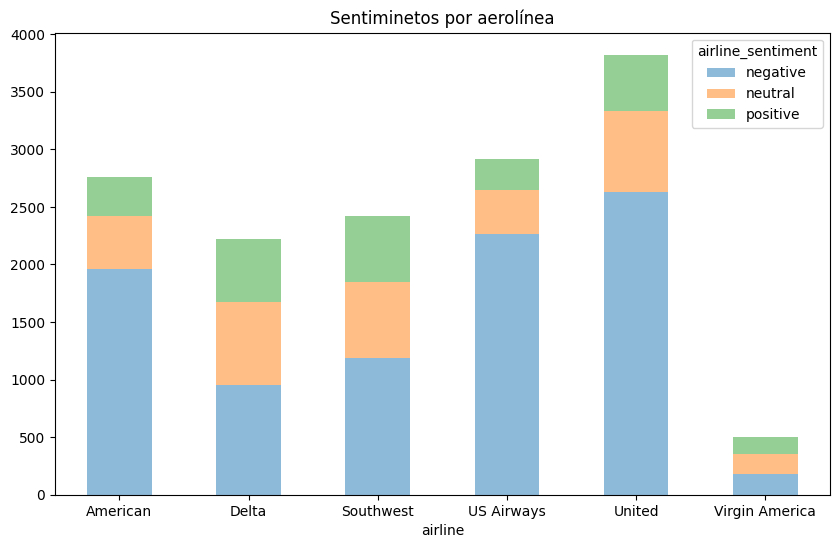

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,
                                                                                  title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
!pip install nltk

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Aplicar CountVectorizer
vect = CountVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

# Entrenando un modelo de Rfg
rf = RandomForestClassifier()
rf.fit(X_train_vect, y_train)

# Predecir el sentimiento de los tweets en el conjunto de prueba
y_pred = rf.predict(X_test_vect)

# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.7686258278145696


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

# Descargar las stopwords
import nltk
nltk.download('stopwords')
vect_no_stopw = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1, 2))

# Aplicar CountVectorizer con eliminación de stopwords
X_train_vect = vect_no_stopw.fit_transform(X_train)
X_test_vect = vect_no_stopw.transform(X_test)

# Entrenando el modelo de RF
rf_stopword = RandomForestClassifier()
rf_stopword.fit(X_train_vect, y_train)

# Predecir el sentimiento de los tweets en el conjunto de prueba
y_pred = rf_stopword.predict(X_test_vect)

# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo con eliminación de stopwords:", accuracy)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy del modelo con eliminación de stopwords: 0.7642798013245033


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
# Celda 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

vect = CountVectorizer()
vect.fit(X_train)
# Definición de lista con vocabulario de la matriz de documentos
words = list(vect.vocabulary_.keys())
#lematización con verbos
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)

# Preprocesamiento aplicado a train y a test
X_train_vect2 = vect_lemas.fit_transform(X_train)
X_test_vect2 = vect_lemas.transform(X_test)
# Entrenamiento el modelo de RF
rf_lemV = RandomForestClassifier()
rf_lemV.fit(X_train_vect2, y_train)
# Predicción del sentimiento de los tweets en el conjunto de prueba
y_pred2 = rf_lemV.predict(X_test_vect2)
# Cálculo del accuracy del modelo
accuracy3 = accuracy_score(y_test, y_pred2)
print("Accuracy del modelo con lematización con verbos:", accuracy3)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Accuracy del modelo con lematización con verbos: 0.7603476821192053


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [22]:
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar el lematizador de WordNet
wordnet_lemmatizer = WordNetLemmatizer()

# Obtener la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para lematizar el texto con verbos y eliminar stopwords
def lemmatize_with_verb_and_stopwords(text):
   words = text.lower().split()
   return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words]

# Aplicar eliminación de stopwords y lematización
vect_stopwords_lemmas = CountVectorizer(analyzer=lemmatize_with_verb_and_stopwords)

# Preprocesamiento aplicado a train y a test
X_train_vect3 = vect_stopwords_lemmas.fit_transform(X_train)
X_test_vect3 = vect_stopwords_lemmas.transform(X_test)

# Entrenamiento del modelo de Random Forest
rf_stopwords_lemmas = RandomForestClassifier()
rf_stopwords_lemmas.fit(X_train_vect3, y_train)

# Predicción del sentimiento de los tweets en el conjunto de prueba
y_pred3 = rf_stopwords_lemmas.predict(X_test_vect3)

# Cálculo del accuracy del modelo
accuracy_stopwords_lemmas = accuracy_score(y_test, y_pred3)
print("Accuracy del modelo con eliminación de stopwords y lematización con verbos:", accuracy_stopwords_lemmas)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy del modelo con eliminación de stopwords y lematización con verbos: 0.765728476821192


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

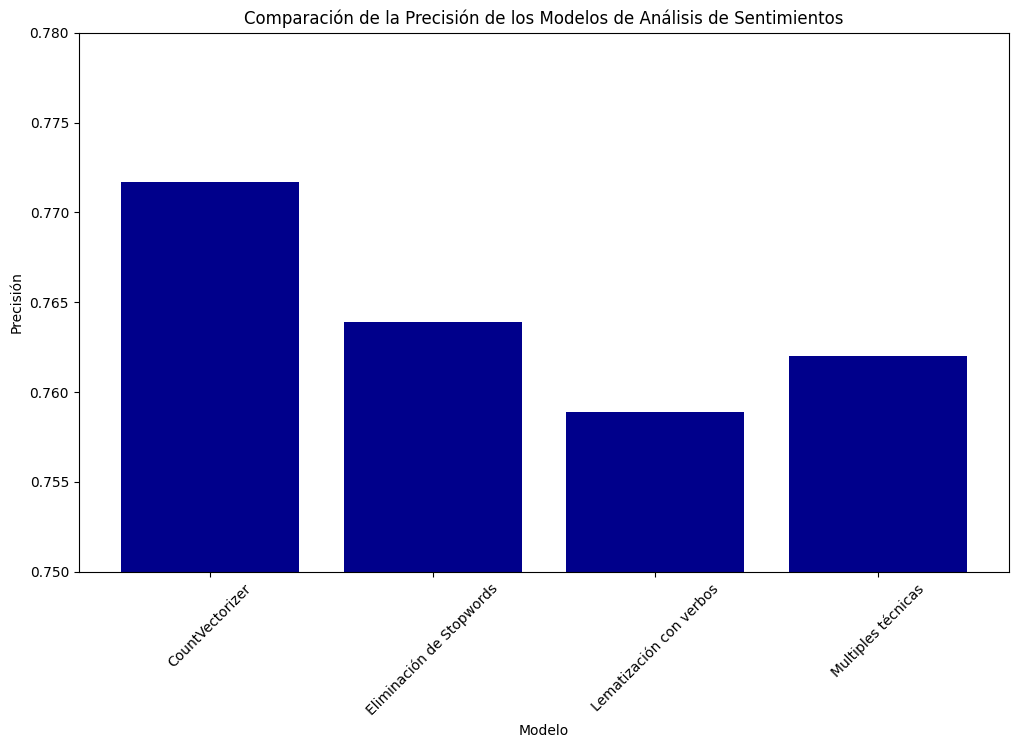

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de los resultados de precisión de los diferentes modelos
resultados = {
    'Modelo': [
        'CountVectorizer',
        'Eliminación de Stopwords',
        'Lematización con verbos',
        'Multiples técnicas'
    ],
    'Precisión': [
        0.7717,  # CountVectorizer
        0.7639,  # Stopwords
        0.7589,  # Lematização
        0.7620   # Multiples técnicas
    ]
}

# Crea un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Visualización de los resultados para una mejor visualización
plt.figure(figsize=(12, 7))
plt.bar(df_resultados['Modelo'], df_resultados['Precisión'], color='darkblue')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Comparación de la Precisión de los Modelos de Análisis de Sentimientos')
plt.ylim(0.75, 0.78)  
plt.xticks(rotation=45)
plt.show()

El gráfico muestra que el modelo que utiliza solamente CountVectorizer obtuvo la precisión más alta con un valor de 0.7717. Este resultado es superior al de los otros modelos que aplicaron técnicas adicionales de preprocesamiento de texto como la eliminación de stopwords y la lematización de verbos.

Este fenómeno puede indicar que para este conjunto específico de datos los comentarios revisados en Twitter incluyendo las stopwords, podría estar contribuyendo significativamente a la identificación correcta de los sentimientos expresados por los usuarios. La eliminación de stopwords y la lematización, aunque son útiles en muchos contextos de NLP para reducir la dimensionalidad y mejorar el enfoque en palabras clave, aquí parecen omitir detalles importantes para identificar la toxicidad de un comentario.

Por otro lado, podemos recalcar que la combinación de técnicas de eliminación de stopwords y lematización no mejoró la precisión en comparación con los modelos que solo utilizaban una de estas técnicas. Esto podría sugerir que el efecto conjunto entre los dos metodos no se materializa de manera efectiva para este dataset específico.

Se concluye que el tratamiento más simple, utilizando solo CountVectorizer, resultó ser el más eficaz para este conjunto específico de datos.